## Scientific Computing 2022: Homework Assignment 2 
Due Monday October 23, 2022 (23:59)

### Problem 1 (2 points)
Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$. 

* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.

* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get 

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

Formula for condition number:
$$k(A_q)  = \sqrt{\frac{\lambda_{max} (A^T A)}{\lambda_{min} (A^T A) }}$$

$$A^*A = A^T A = \begin{pmatrix}
1 & q\\ 
q & q^2+1\\ 
\end{pmatrix}$$
Eigenvalues:
$$det \begin{pmatrix}
1 - \lambda & q\\ 
q & q^2+1 - \lambda\\ 
\end{pmatrix} = \lambda^2 - \lambda(2+q^2) +1$$
Thus: $$ \lambda_\pm = \frac{\left(2+q^2 \pm |q| \sqrt{4+q^2}  \right)}{2} $$
$$ \lambda_{+} = \frac{\left(2+q^2 + |q| \sqrt{4+q^2}  \right)}{2} \ and 
\ \lambda_{-} = \frac{\left(2+q^2 - |q| \sqrt{4+q^2}  \right)}{2}$$
We can easily see from above that $\lambda_{+} \geq \lambda_{-}$, then:
$$k(A_q) = \sqrt{\frac{2+q^2 + |q| \sqrt{4+q^2}}{2+q^2 - |q| \sqrt{4+q^2}}} = \frac{\left( 2+q^2 + |q| \sqrt{4+q^2} \right)}{2}$$

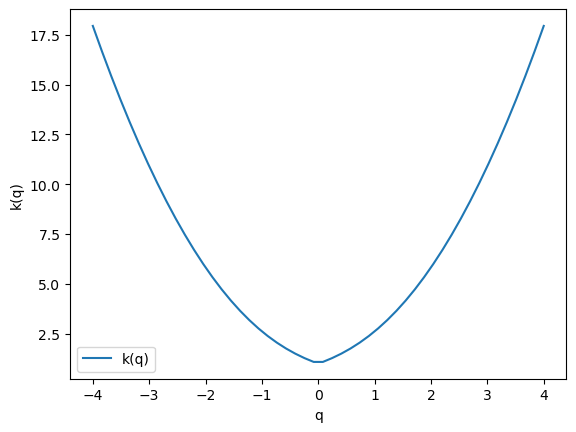

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(q):
    k =(2 + q ** 2 + np.abs(q) * np.sqrt(4 + q ** 2))/2
    return k

x  = np.linspace(-4, 4, 50)
plt.plot(x, f(x), label = 'k(q)')
plt.xlabel('q')
plt.ylabel('k(q)')
plt.legend(loc='best')

We can see that the matrix is well-conditioned when  close to 0

* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get 

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

Recall that: 
$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\le \kappa(A)\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|},$$

where $\kappa(A)$ is **condition number**:
$\kappa(A)=\|A\|\cdot\|A^{-1}\|$

Our case: 
$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$


\begin{pmatrix} 1 & q \\ 0 & 1  \end{pmatrix}\begin{pmatrix} x_1 \\ x_2\end{pmatrix} = \begin{pmatrix} x_1+qx_2 \\ x2 \end{pmatrix} 
\quad
and 
\quad
\begin{pmatrix} 1 & q \\ 0 & 1  \end{pmatrix}\begin{pmatrix} x_1+ \Delta x_1\\ x_2+ \Delta x_2\end{pmatrix} = \begin{pmatrix} x_1+\Delta x_1 + q(x_2+ \Delta x_2) \\ x_2+ \Delta x_2 \end{pmatrix}

$$\frac{\Delta x_{1}^{2} + \Delta x_{2}^{2}}{x_{1}^{2} + x_{2}^{2}}\ge 10^{12}\frac{\Delta x_{1}^{2} + q^{2}\Delta x_{2}^{2} + 2q\Delta x_{1} \Delta x_{2} + \Delta x_{2}^{2}}{x_{1}^{2} + x_{2}^{2} + q^{2} x_{2}^{2} + q x_{1} x_{2}}.$$

Take $q = - \frac{\Delta x_{1}}{\Delta x_{2}}$, if $q$ be large and $\Delta x_{1} > \Delta x_{2}$, we can solve the inequality by finding the minimal $q$ and $b, \Delta b$ when we have  $x$ and $\Delta x$ that will satisfy the inequality

In [13]:
def norm_L2(x):
    return np.sqrt(np.square(x).sum())

def minimal(x, alpha):
    assert len(x) == 2, "the array must be of length 2"
    assert x[1] != 0, "second entry cannot be zero"
    q = 1
    x = np.array(x)
    
    
    while True:
        A = [[1, q], [0, 1]]
        dx = [alpha, - alpha / q]
        b = np.dot(A, x)
        db = b - np.dot(A, x + dx)

        right = norm_L2(db) / norm_L2(b)
        left = norm_L2(dx) / norm_L2(x) 
        
        if left >= 1e6 * right:
            print (q, x, dx, b, db)
            print('--------------------')
            print('q = ', q)
            print('|dx| = ', norm_L2(dx))
            print(' |x| = ', norm_L2(x))
            print('|db| = ', norm_L2(db))
            print(' |b| = ', norm_L2(b))
            break
        elif q == 1e5:
            print("Not found!!!")
            return False
        q += 1


minimal([1,1], -100)

1189 [1 1] [-100, 0.08410428931875526] [1190    1] [-2.27373675e-13 -8.41042893e-02]
--------------------
q =  1189
|dx| =  100.00003536765115
 |x| =  1.4142135623730951
|db| =  0.08410428931875535
 |b| =  1190.000420167993


### Problem 2 (2 points)
* Write a program to compute an approximate value for the derivative of a function using the finite-difference formula 

  $$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

  Test your program using the function $\tan(x)$ at $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of $h$, for $h=10^{-k}, k=0,\ldots,16$. You should use log scale for $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.
* Repeat the exercise using the centered difference approximation

 $$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

 What is now different and why?

In [96]:
from math import tan, cos

h=0.0001
f = tan

#exact solution
def exact_derivative(x=1):
    exact = 1/cos(x)**2
    return exact
print('Using exact derivative, the approximate value for derivative =', exact_derivative())

#forward approximate
def forward_diff(x, h, f = tan):
    difference = f(x+h) - f(x)
    return difference/h
print('Using forward difference approximation, the approximate value for derivative = ',forward_diff(1,h))

#centered approximate
def center_diff_2h(x, h,f=tan):
    difference = f(x+h) - f(x-h)
    h= 2*h
    return difference/h

print('Using Centered difference approximation, the approximate value for derivative = ',center_diff_2h(1,h))


#error
def error(x,h,func=forward_diff):
    return abs(func(x,h) - exact_derivative(1))

print('\nApproximation error for forward difference = ',error(1,h))

#error check for centered method
print('\nApproxation error for Centered differnce = ',error(1,h,func = center_diff_2h))


Using exact derivative, the approximate value for derivative = 3.425518820814759
Using forward difference approximation, the approximate value for derivative =  3.4260524082818655
Using Centered difference approximation, the approximate value for derivative =  3.425518915318726

Approximation error for forward difference =  0.0005335874671064111

Approxation error for Centered differnce =  9.450396687427087e-08


To plot the error-stepsize graph.

Text(0.5, 1.0, 'Error Plot')

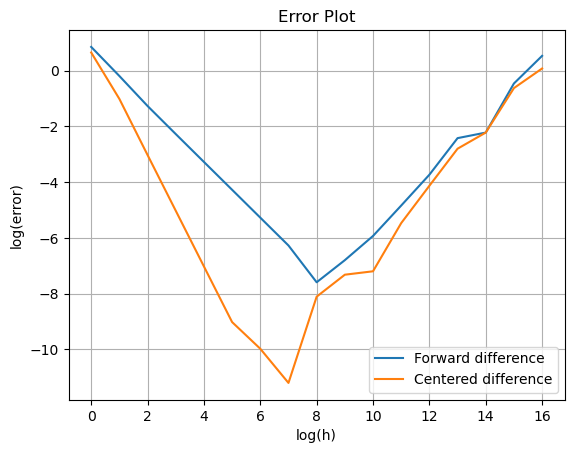

In [99]:
import matplotlib.pyplot as plt
#function to plot error graph
def plot_error(func = forward_diff):
    k = np.arange(17)
    h = np.logspace(0,-16,num=17)
    err = []
    for i in h:
        a = np.log10(error(1,i,func)) #error on logscale
        err.append(a)
    plt.plot(k,err)
    plt.ylabel('log(error)')
    plt.xlabel('log(h)')

plot_error()
plot_error(center_diff_2h)
plt.grid()
plt.legend(['Forward difference','Centered difference'])
plt.title('Error Plot')

In [100]:
print('From the graph, for forward difference, we observe that the minimum error is {} achieved at h= 1e-{}.'.format(error(1,10**(-8)),8))
print('For centered difference, we observe that the minimum error is {} achieved at h= {}.'.format(error(1,1.e-7,center_diff_2h),1.e-7))

From the graph, for forward difference, we observe that the minimum error is 2.554135347665465e-08 achieved at h= 1e-8.
For centered difference, we observe that the minimum error is 6.2239102760486276e-12 achieved at h= 1e-07.


Expand the function $f(x)$ in a Taylor series at the points $(x + h)$ and $(x - h)$.

$$ f(x+h)=f(x)+hf′(x)+ 2 f′′(x)+ 6 f′′′(x)+... $$

$$ \frac{f(x+h) - f(x)}{h} = f′(x) + \frac{h}{2}f''(x)+ ... $$


In the first order of decomposition derivative calculation error in the case of finite-difference formula:
$$O(h) = - \frac{h}{2}f''(x) + ...$$

If $h$ is chosen to be very small, rounding errors in computing on a computer may be comparable or greater than $h$.

A smaller value of the error for the same value of x gives the centered difference approximation.

$$O(h^2) = - \frac{h^2}{6}f'''(x) + ...$$

### Problem 3 (2 points)
* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (`Xtrain`, `Ytrain`) and the input part of test data (`Xtest`), and output a prediction for test data (`Ypred`). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., `scikit-learn`). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.
* Test your algorithm on real data from UCI repository:
  * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
  * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
  
  Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error as the measure of accuracy.
  Compare your results with results of some linear models implemented in standard predictive modeling software    (e.g., `Ridge` and `LinearRegression` from `scikit-learn`).

We can estimate the regression coefficients:

$$\widetilde{\mathbf c}= (X^t_{\mathrm train}X_{\mathrm train}+\mu)^{-1}X_{\mathrm train}^t\mathbf y_{\mathrm train}$$

Then, we can use the estimated coefficients to make prediction on the test data:

$$\mathbf y_{\mathrm pred}=X_{\mathrm test}\widetilde{\mathbf c}$$

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import *
import pandas as pd

# load data
def loadData(data=1):
    assert data == 1 or data == 2
    if data==1:
        df = pd.read_csv('slice_localization_data.csv')
        X = df.iloc[:, 1:-1] # excluding the ID
        y = df['reference']
        return df,X, y
    else:
        df = pd.read_csv('CASP.csv')
        temp_cols=df.columns.tolist()
        new_cols=temp_cols[1:] + temp_cols[0:1]
        df=df[new_cols]
        X = df.iloc[:, 1:-1] # excluding the ID
        y = df['RMSD']
        return df, X, y

#data preprocessing
def split_train_test(df,train_size):
    """
    Split arrays into random train and test subsets.

    Parameters
    df: dataframe or array
    train_size: train_size : int, represent the proportion of the dataset to include in the train split.

    output: 
    """
    N = len(df)
    A = df.iloc[:,:-1] # input is all columns but the last
    A.iloc[:,0] = 1 #insert constants instead to cater for bias
    b = df.iloc[:,-1] # output is last column
    np.random.seed(42)
    inds = np.random.permutation(N)
    train = inds[:train_size]
    test = inds[train_size:]
    X_train = A.iloc[train]
    y_train = b.iloc[train]
    X_test = A.iloc[test]
    y_test = b.iloc[test]
    return X_train,y_train,X_test,y_test

#regularized regression
def Reg_Regression(Xtrain,Ytrain,Xtest,mu=1e-4):
    """
    Returns the predicted array using regularized regression model

    Parameter:
    Xtrain: the observed training dataset input
    Ytrain: the observed training dataset output
    Xtest: the test dataset
    mu: is the ridge regularization parameter, default=1e-4
    """
    Q = Xtrain.T.dot(Xtrain)
    y1 = Xtrain.T.dot(Ytrain)
    coeffs = np.linalg.inv(Q+mu*np.eye(Xtrain.shape[1])).dot(y1)
    Ypred = Xtest.dot(coeffs)
    return Ypred

#RRMS
def RRMS(Ypred,Ytest):
    """
    Returns the relative RMS error of two arrays or matrices

    Parameter

    Ypred: the estimated value
    Ytest: the observed value
    """
    RRMS = np.linalg.norm(Ypred-Ytest)/np.linalg.norm(Ytest-np.mean(Ytest))
    return RRMS

def optimize_Regul_Param(Xtest, Ytest,Xtrain,Ytrain, mu_log_start=5, mu_log_stop=-5):
    mu_ = np.logspace(mu_log_start,mu_log_stop) #choice of regularization parameter
    Ypred_ = np.zeros((mu_.shape[0],Xtest.shape[0]))
    error = np.zeros_like(mu_)
    mu_best = 0
    for i,mu in enumerate(mu_):
        Y_pred = Reg_Regression(Xtrain,Ytrain,Xtest,mu)
        error[i] = RRMS(Y_pred,Ytest)  
    r =np.argmin(error)
    #plot error
    print("Minimum error: ",error[r])
    print("Best mu: ",mu_[r])
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('log(mu)')
    plt.ylabel('RMSE')
    plt.title('Plot of Error')
    plt.plot(mu_,error)
    plt.plot(mu_[r],error[r], 'bo')
    plt.grid()
    return



#### Relative location of CT slices on axial axis Data Set

In [47]:
df, X,y =loadData(1)
train_size = 300
X_train,y_train,X_test,y_test = split_train_test(df,train_size)

Minimum error:  0.4606900854818803
Best mu:  13.257113655901081


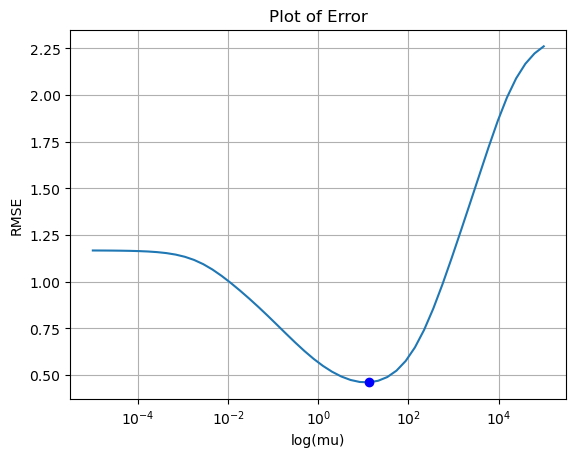

In [70]:
# get the optimum regularization parameter
optimize_Regul_Param(X_test, y_test,X_train,y_train, mu_log_start=5, mu_log_stop=-5)

From the above graph, the optimum regularizaton parameter is at $mu = 13.257113655901081$. We can use this optimal parameter to train over model

In [10]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [71]:
# Regularized Regression Model
y_pred=Reg_Regression(X_train,y_train,X_test,13.257113655901081) # using the mu=1e1
print("Regularized Regression Model RMS Error: ", RRMS(y_pred,y_test))


#ridge model
model_ridge = Ridge()
model_ridge.fit(X_train,y_train) 
Ypred = model_ridge.predict(X_test)
# print ('Ridge Model RMS Error: ', metrics.mean_squared_error(Ypred, y_test))
print ("\nRidge model RMS error: ", RRMS(Ypred, y_test))

#LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train,y_train) 
Ypred = model_LR.predict(X_test)
# print ('\nLinear Regression Model RMS error: ', metrics.mean_squared_error(Ypred, y_test))
print ("\nLinear Regression model RMS error: ", RRMS(Ypred,y_test))


Regularized Regression Model RMS Error:  0.4606900854818803

Ridge model RMS error:  0.5610948118635676

Linear Regression model RMS error:  1.175952147780937


#### Physicochemical Properties of Protein Tertiary Structure Data Set

In [72]:
df, X,y =loadData(2)
train_size = 300
X_train,y_train,X_test,y_test = split_train_test(df,train_size)

Minimum error:  0.8709973768730779
Best mu:  0.5179474679231213


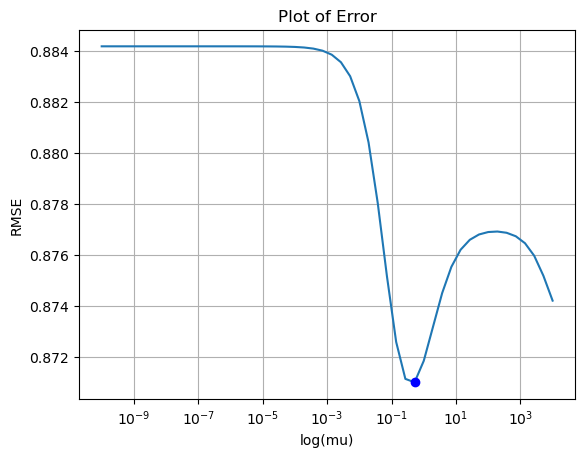

In [73]:
# get the optimum regularization parameter
optimize_Regul_Param(X_test, y_test,X_train,y_train, 4, -10)

From the above graph, the optimum regularizaton parameter $mu = 0.5179474679231213$. I will use 1e-7 to train over the model

In [75]:
# Regularized Regression Model
y_pred=Reg_Regression(X_train,y_train,X_test,0.5179474679231213) # using the mu=1e1
print("Regularized Regression Model RMS Error: ", RRMS(y_pred,y_test))


#ridge model
model_ridge = Ridge()
model_ridge.fit(X_train,y_train) 
Ypred = model_ridge.predict(X_test)
# print ('Ridge Model RMS Error: ', metrics.mean_squared_error(Ypred, y_test))
print ("\nRidge model RMS error: ", RRMS(Ypred, y_test))

#LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train,y_train) 
Ypred = model_LR.predict(X_test)
# print ('\nLinear Regression Model RMS error: ', metrics.mean_squared_error(Ypred, y_test))
print ("\nLinear Regression model RMS error: ", RRMS(Ypred,y_test))

Regularized Regression Model RMS Error:  0.8709973768730779

Ridge model RMS error:  0.8703310848020411

Linear Regression model RMS error:  0.8841765546160526


From the test of the algorithm on both real life examples, the results shows that from the specialized libraries agrees with that of the regularized regression algorithm.

### Problem 4 (2 points)
Suppose that we use the Leapfrog algorithm with some $\Delta t$ to simulate the dynamics of the harmonic oscillator (https://en.wikipedia.org/wiki/Harmonic_oscillator) with positive mass $m$ and force constant $k$ (in other words, with the energy function $H=\frac{m\dot x^2}{2}+\frac{kx^2}{2}$). Assuming a perfect implementation of Leapfrog, at which combinations of $\Delta t, m, k$ will the simulation diverge as $n\to\infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$?

Leapfrog scheme:
$$
\tilde x_{n+1} = \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1/2} = \tilde v_{n-1/2}+f_1(\tilde x_n)\Delta t
$$
Now, 
$$
F = ma = -kx
$$

$$
f_1(x_n) = - \frac{k}{m}x_n
$$

Then, we have

\begin{align}
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1/2} &= \tilde v_{n-1/2}-\frac{k}{m}x_n\Delta t
\end{align}

From equation 1: $$v_{n+1/2} = \frac{x_{n+1} - x_n}{\Delta t}$$
Likewise: $$v_{n-1/2} = \frac{x_{n} - x_{n-1}}{\Delta t}$$
Putting the above in $$v_{n+1/2} = \tilde v_{n-1/2}-\frac{k}{m}x_n\Delta t$$
we have: $$\frac{x_{n+1} - 2x_n +x_{n-1}}{\Delta t} = - \frac{k}{m} x_n \Delta t$$
Thus: $$x_{n+1} + \left(\frac{k \Delta t^2}{m}  -2\right) x_n  + x_{n-1} = 0$$
Using the spectral method: $x_n = \lambda^n, \; n = [0, \dots, N]$
$$\lambda^2 + \left(\frac{k \Delta t^2}{m}  -2\right) \lambda + 1 = 0$$
The roots of the equation:
$$\lambda_{1,2} = \frac{\left(2 - \phi \pm \sqrt{\phi(\phi-4)} \right)}{2} , \; \text{where } \phi = \frac{k \Delta t^2}{m} $$

 We shall get same result for variable $v_{n+1/2}$ which is why $\sup_n(x^2_n+v^2_{n+1/2})=\infty \Longleftrightarrow \sup_n(x^2_n)=\infty  \Longleftrightarrow \sup_n|x_n| = \infty$. Thus, enough to investigate the conditions of convergence of this scheme for variable x.

$\sup_n |x_n| = \sup_n |\lambda^n| = \infty$. Hence if $|\lambda| > 1$ then the scheme diverges.

Thus, $\phi$ ($\phi > 0$) must be more than 4:
$$\frac{k \Delta t^2}{m} > 4 \Longleftrightarrow \Delta t> 2\sqrt{\frac{m}{k}}$$

Note: this scheme is converging when $\phi \in [0,4]$. In this case the $\lambda$ is complex number and it's not difficult to show that $|\lambda| = \lambda \lambda^* = 1$.

### Problem 5 (2 points)
Consider the velocity Verlet method for solving the equation $\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$: 

\begin{align}
\tilde v_{n+1/2} &= \tilde v_{n}+\frac{1}{2}f_1(\tilde x_n)\Delta t\\
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1} &= \tilde v_{n+1/2}+\frac{1}{2}f_1(\tilde x_{n+1})\Delta t
\end{align}
Find its global convergence order and verify it experimentally.

### Solution

Given that $\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$, we have $x'(t) = v, v'(t) = f_1(x)$. 

We consider the taylor's expansion for $x(t+\Delta t),v(t+\Delta t)$ and $v(t+\frac{\Delta t}{2})$. We obtain

\begin{align}
x(t+\Delta t) &= x(t) +  x'(t)\Delta t +  x''(t)\frac{\Delta t^2}{2} + \mathcal{O}(\Delta t^3)\\
&= x(t) +  v(t)\Delta t + f_1(x(t)) \frac{\Delta t^2}{2}  + \mathcal{O}(\Delta t^3), \\
v(t+\Delta t) &= v(t) +  v'(t)\Delta t + v''(t) \frac{\Delta t^2}{2} + \mathcal{O}(\Delta t^3)\\
&= v(t) + f_1(x)\Delta t + f_1'(x) \frac{\Delta t^2}{2} + \mathcal{O}(\Delta t^3),\\
v\bigg(t+\frac{\Delta t}{2}\bigg)&= v(t) +  v'(t)\frac{\Delta t}{2} + \mathcal{O}(\Delta t^2)\\
&= v(t) +  f_1(x(t))\frac{\Delta t}{2} + \mathcal{O}(\Delta t^2).
\end{align}

After discretizing the time space, the Left Hand Side of the above can be approximated with
\begin{align}
x(t+\Delta t) &= x_n + v_n\Delta t + f_1(x_n) \frac{\Delta t^2}{2}  + \mathcal{O}(\Delta t^3), &\cdots(1)\\
v(t+\Delta t) &= v_{n} + f_1(x_{n})\Delta t + f_1'(x_n)\frac{\Delta t^2}{2} + \mathcal{O}(\Delta t^3),&\cdots(2)\\
v\bigg(t+\frac{\Delta t}{2}\bigg)&= v_n +  f_1(x_{n})\frac{\Delta t}{2} + \mathcal{O}(\Delta t^2). &\cdots(3)
\end{align}

Using equations (1), (3) and the velocity verlet formulation, we obtain
\begin{align}
x(t+\Delta t) &= x_n + v_n\Delta t + f_1(x_n) \frac{\Delta t^2}{2}  + \mathcal{O}(\Delta t^3) \\
&= x_n + \bigg(v_n + f_1(x_n) \frac{\Delta t}{2}  + \mathcal{O}(\Delta t^2)\bigg)\Delta t\\
&= x_n + \bigg(v_n + f_1(x_n) \frac{\Delta t}{2}\bigg)\Delta t  + \mathcal{O}(\Delta t^3)\\
&= x_n +v_{n+\frac{1}{2}} \Delta t+\mathcal{O}(\Delta t^3)\\
&= x_{n+1}  +\mathcal{O}(\Delta t^3).\\
x(t+\Delta t) - x_{n+1} &= \mathcal{O}(\Delta t^3). &\cdots(4)
\end{align}
Finally, from the equation (2) and the verlet equation, we have
\begin{align}
v(t+\Delta t) &=v_{n} + f_1(x_{n})\Delta t + f_1'(x_n)\frac{\Delta t^2}{2} + \mathcal{O}(\Delta t^3)\\
&= v_{n} + \bigg(2f_1(x_{n}) + f_1'(x_n)\Delta t \bigg)\frac{\Delta t}{2} + \mathcal{O}(\Delta t^3)\\
&= v_{n} + \bigg(f_1(x_{n}) + (f_1(x_{n})+ f_1'(x_n)\Delta t) \bigg)\frac{\Delta t}{2} + \mathcal{O}(\Delta t^3)\\
&= v_{n} + \bigg(f_1(x_{n}) + f_1(x_{n+1})+ \mathcal{O}(\Delta t^2) \bigg)\frac{\Delta t}{2} + \mathcal{O}(\Delta t^3)\\
&= v_{n} + \frac{1}{2}f_1(x_{n})\Delta t + \frac{1}{2}f_1(x_{n+1})\Delta t + \mathcal{O}(\Delta t^3)\\
&= v_{n+1/2} +\frac{1}{2}f_1(x_{n+1})\Delta t + \mathcal{O}(\Delta t^3)\\
&= v_{n+1} + \mathcal{O}(\Delta t^3)\\
v(t+\Delta t) - v_{n+1} &= \mathcal{O}(\Delta t^3). &\cdots(5)
\end{align}
Equations (4) and (5) suggests that the method has a local convergence of order 3 on both position and velocity i.e $\mathcal{O}(\Delta t^3)$.


To estimate the global convergence, $E$, consider the interval $[0,T]$ discretized with a stepsize $\Delta t$ into N grids. We sum up the local error, $e_n$, so that we have
\begin{align}
E &\propto \sum_{n=1}^N e_n\\
&\propto N\cdot \mathcal{O}(\Delta t^3)\\
&\propto \frac{T}{\Delta t} \mathcal{O}(\Delta t^3)\\
&\propto \mathcal{O}(\Delta t^2)\\
\end{align}
We conclude that the position, $x$, and velocity $v$ is of global convergence order 2 i.e $\mathcal{O}(\Delta t^2)$. 

Consider the pendulum example

Consider a mathematical pendulum and denote by $\alpha$ the angle it forms with the vertical axis. Suppose that the length $l=1$ and the gravity acceleration $g=1$. Then the dynamics of the pendulum is described by the equation

$$\ddot{\alpha}=-\sin \alpha.$$

Denoting $v=\dot \alpha$, rewrite as a first-order system $\dot{X}=f(X)$, where $X = {\alpha\choose v}$:

$$\frac{d}{dt}{\alpha\choose v}={v\choose -\sin \alpha}.$$

Error in E at dt=1.000000e+00: 1.681557e-01
Error in E at dt=1.000000e-01: 1.258845e-03
Error in E at dt=1.000000e-02: 1.256175e-05
Error in E at dt=1.000000e-03: 1.256149e-07
Error in E at dt=1.000000e-04: 1.256139e-09


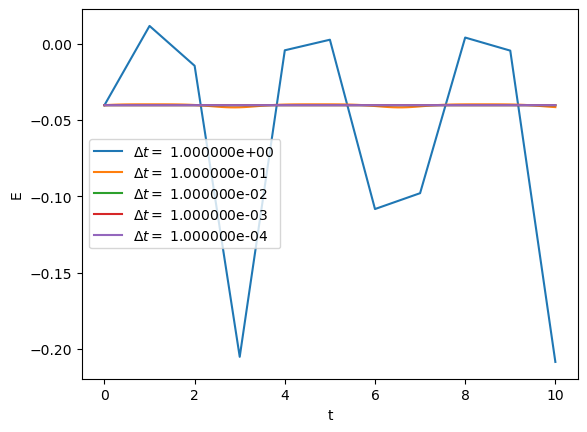

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

def f1(x):
    return - np.sin(x)

#Velocity Verlet Algorithm

def Velocity_Verlet(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0]
    vHistory_ = []
    vHistory = [v0]# at half-integer times
    tHistory = [0]
    for n in range(N):
        vHistory_.append(vHistory[-1]+dt/2.*f1(xHistory[-1]))
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory.append(vHistory_[-1]+dt/2.*f1(xHistory[-1]))
        tHistory.append(dt*(n+1))
    return xHistory, vHistory, tHistory


#Exact solution
def E(X):
    return X[1]*X[1]/2-np.cos(X[0])

dt_ =[]; error_=[]
for dt in np.logspace(0,-4,5):
    xHistory, vHistory, tHistory = Velocity_Verlet(f1, 1., 1., dt=dt, N=int(10./dt)) 
    Ehistory = [E([xHistory[n], vHistory[n]]) for n in range(len(xHistory))]
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ %e' %dt )
    print ('Error in E at dt=%e: %e' %(dt, np.abs(Ehistory[-1]-Ehistory[0])))
   
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()